# Are We Eating Planet Earth? That's What The Stats Say.

### 188 Countries. One Planet. Some Very Uncomfortable Math.

---

**The Question Everyone's Afraid to Ask:**

If Earth is a pizza, how many slices did your country take? And did anyone check if there's enough for everyone?

Spoiler: There isn't. We're eating the pizza, the box, and starting on the table.

---

**What We're Investigating:**

- How much does each country consume vs. how much can it produce?
- Who's living within their means? Who's running on ecological credit?
- If everyone lived like [insert country], how many Earths would we need?
- When exactly do we max out Earth's annual budget? (Hint: It's in August)
- Is it possible to be wealthy AND sustainable? (Hint: Nobody's done it yet)

---

**The Players:**

- 188 countries in the lineup
- 7 billion humans doing the consuming
- 1 planet doing the providing
- 0 backup Earths in storage

---

**The Evidence:**

Ecological footprint data from the Global Footprint Network - the people who do the math so we can collectively panic.

---
link https://www.kaggle.com/datasets/footprintnetwork/ecological-footprint/data



*The stats are in. The verdict isn't pretty. Let's dive in.*

## Imports & Data Loading

In [13]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Shushing the warnings because we have enough anxiety about the planet
warnings.filterwarnings('ignore')

# Making our charts look less like a 1995 PowerPoint presentation
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Setting the vibe for our visualizations
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


# Download latest version
path = kagglehub.dataset_download("footprintnetwork/ecological-footprint")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ecological-footprint' dataset.
Path to dataset files: /kaggle/input/ecological-footprint


In [2]:
print(os.listdir(path))

['countries.csv']


In [5]:
df = pd.read_csv(os.path.join(path,'countries.csv'))

In [6]:
# First contact with the data
print("=" * 60)
print("EVIDENCE LOADED SUCCESSFULLY")
print("=" * 60)
print(f"Countries in the lineup: {df.shape[0]}")
print(f"Clues per country: {df.shape[1]}")
print("=" * 60)
print("\nFirst look at the suspects...")
df.head()

EVIDENCE LOADED SUCCESSFULLY
Countries in the lineup: 188
Clues per country: 21

First look at the suspects...


,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


# Chapter 1: Understanding the Evidence

---

## What Just Happened?

We've got **188 countries** in our lineup and **21 clues** about each one.

That's 188 suspects in the great planetary heist. Someone's been stealing Earth's resources, and we're about to find out who.

---

## But Wait... What Do These Columns Even Mean?

Before we start pointing fingers, let's understand what we're looking at.

**The Footprint Side (What Countries CONSUME):**
- **Cropland Footprint** - Land needed to grow food and fiber
- **Grazing Footprint** - Land needed for livestock to munch around
- **Forest Footprint** - Forests consumed for timber and paper (RIP trees)
- **Carbon Footprint** - Land needed to absorb CO2 emissions (the big one)
- **Fish Footprint** - Ocean resources consumed (sorry, Nemo)
- **Total Ecological Footprint** - The full damage report

**The Biocapacity Side (What Countries PRODUCE):**
- **Cropland, Grazing Land, Forest Land, Fishing Water, Urban Land** - What the country can actually regenerate
- **Total Biocapacity** - The country's natural "income"

**The Verdict:**
- **Biocapacity Deficit or Reserve** - Negative = Overspending. Positive = Actually responsible.
- **Earths Required** - If everyone lived like this country, how many Earths would we need?
- **Countries Required** - How many of THIS country would be needed to sustain its own lifestyle?

---

## I Already Spotted Something Suspicious

Antigua and Barbuda has a bunch of NaN values but still has a Total Ecological Footprint of 5.38.

Interesting. Very interesting.

Let's dig deeper into the data quality situation...

In [7]:
# Spoiler: There's always a mess.

print("=" * 60)
print("DATA TYPES - What Are These Columns Made Of?")
print("=" * 60)
print(df.dtypes)
print("\n")

# The classic info dump
print("=" * 60)
print("THE FULL MUGSHOT")
print("=" * 60)
df.info()

DATA TYPES - What Are These Columns Made Of?
Country                            object
Region                             object
Population (millions)             float64
HDI                               float64
GDP per Capita                     object
Cropland Footprint                float64
Grazing Footprint                 float64
Forest Footprint                  float64
Carbon Footprint                  float64
Fish Footprint                    float64
Total Ecological Footprint        float64
Cropland                          float64
Grazing Land                      float64
Forest Land                       float64
Fishing Water                     float64
Urban Land                        float64
Total Biocapacity                 float64
Biocapacity Deficit or Reserve    float64
Earths Required                   float64
Countries Required                float64
Data Quality                       object
dtype: object


THE FULL MUGSHOT
<class 'pandas.core.frame.DataFrame'>
Ra

# Chapter 2: The Diagnosis

---

## We Have Some Issues. Let's Talk About Them.

Like any good investigation, our evidence has some... complications.

---

## Issue #1: GDP is Playing Dress-Up

**GDP per Capita** is an `object` (string) instead of a number.

Why? Because someone decided to format it like `$4,534.37` instead of just `4534.37`.

Thanks. Very helpful. We'll need to undress that column later.

---

## Issue #2: Missing Persons Report

| Column | Missing Values | Percentage |
|--------|----------------|------------|
| HDI | 16 missing | 8.5% |
| GDP per Capita | 15 missing | 8.0% |
| Individual Footprint Components | 15 missing each | 8.0% |

**173 out of 188 countries** have complete footprint breakdowns.

The other 15 countries showed up to the exam but left some answers blank. Classic move.

---

## Issue #3: The Good News

- **Total Ecological Footprint** - 188/188 complete
- **Total Biocapacity** - 188/188 complete  
- **Biocapacity Deficit or Reserve** - 188/188 complete
- **Earths Required** - 188/188 complete

The important stuff is all here. We can still solve this case.

---

## The Plan

1. Clean up that GDP column (remove the dollar signs and commas)
2. Investigate the missing values
3. Then... we start pointing fingers at the guilty countries

Let's get cleaning.

In [8]:
# Time to make this data presentable.
# Like cleaning your room before your parents visit.

# First, let's fix that GDP column
# Removing the dollar signs, commas, and converting to float
df['GDP per Capita'] = df['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)

print("GDP Column: Before and After Makeover")
print("-" * 40)
print(f"Data type now: {df['GDP per Capita'].dtype}")
print(f"Sample values: {df['GDP per Capita'].head(3).tolist()}")
print("\nNailed it.\n")

# MISSING VALUES: Who Didn't Do Their Homework?
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_report = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print("MISSING VALUES REPORT")
print("-" * 40)
print(missing_report[missing_report['Missing Count'] > 0])
print("\n")

# WHO ARE THESE MYSTERIOUS COUNTRIES WITH MISSING DATA?
incomplete_countries = df[df['Cropland Footprint'].isnull()]['Country'].tolist()

print("COUNTRIES THAT LEFT ANSWERS BLANK")
print("-" * 40)
for country in incomplete_countries:
    print(f"  - {country}")
print(f"\nTotal: {len(incomplete_countries)} countries playing hard to get")

GDP Column: Before and After Makeover
----------------------------------------
Data type now: float64
Sample values: [614.66, 4534.37, 5430.57]

Nailed it.

MISSING VALUES REPORT
----------------------------------------
                    Missing Count  Percentage
HDI                            16        8.51
GDP per Capita                 15        7.98
Forest Footprint               15        7.98
Grazing Footprint              15        7.98
Cropland Footprint             15        7.98
Urban Land                     15        7.98
Fishing Water                  15        7.98
Grazing Land                   15        7.98
Carbon Footprint               15        7.98
Fish Footprint                 15        7.98
Cropland                       15        7.98
Forest Land                    15        7.98


COUNTRIES THAT LEFT ANSWERS BLANK
----------------------------------------
  - Antigua and Barbuda
  - Aruba
  - Bermuda
  - British Virgin Islands
  - Cabo Verde
  - Cambodia
  - 

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2641664533.py:6: SyntaxWarning: invalid escape sequence '\$'
  df['GDP per Capita'] = df['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)


# Chapter 3: What We Learned From Cleaning

---

## The GDP Surgery Was Successful

Dollar signs and commas removed. The column is now a proper number.

(Ignore that syntax warning - it's just Python being dramatic about backslashes. The code works fine.)

---

## The 15 Mystery Countries

Interesting crew we've got here:

**Tiny Island Nations:**
- Antigua and Barbuda, Aruba, British Virgin Islands, Cabo Verde, Grenada, Montserrat, Nauru, Saint Vincent and Grenadines, Wallis and Futuna Islands

**The Plot Twist:**
- **Estonia, Finland, and Norway** - Three wealthy European countries with incomplete data? Really?

**Others:**
- Bermuda, Cambodia, Djibouti

---

## Why Does This Matter?

These 15 countries have **Total Ecological Footprint** values but no breakdown of WHERE that footprint comes from.

It's like knowing someone spent $1000 but not knowing if it was on rent, food, or an irresponsible amount of houseplants.

---

## Our Strategy

We'll keep these countries for overall analysis but exclude them when we dive into the specific footprint components.

Fair? Fair.

---

## Now The Fun Part Begins

The data is clean enough. Time to start asking the real questions.

**Who's eating the planet?**

In [9]:
# Let's get the lay of the land
# What does the "average" country look like?

key_columns = [
    'Population (millions)',
    'HDI',
    'GDP per Capita',
    'Total Ecological Footprint',
    'Total Biocapacity',
    'Biocapacity Deficit or Reserve',
    'Earths Required'
]

print("THE GLOBAL SNAPSHOT")
print("-" * 70)
print(df[key_columns].describe().round(2))
print("\n")

# The headline numbers
print("THE HEADLINES")
print("-" * 70)
print(f"Average country footprint: {df['Total Ecological Footprint'].mean():.2f} global hectares per person")
print(f"Average country biocapacity: {df['Total Biocapacity'].mean():.2f} global hectares per person")
print(f"Average deficit/reserve: {df['Biocapacity Deficit or Reserve'].mean():.2f} global hectares per person")
print(f"\nAverage Earths Required: {df['Earths Required'].mean():.2f}")
print(f"Median Earths Required: {df['Earths Required'].median():.2f}")
print("\n")

# The extremes
print("THE EXTREMES")
print("-" * 70)
max_footprint = df.loc[df['Total Ecological Footprint'].idxmax()]
min_footprint = df.loc[df['Total Ecological Footprint'].idxmin()]

print(f"Biggest appetite: {max_footprint['Country']} ({max_footprint['Total Ecological Footprint']:.2f} gha)")
print(f"Smallest appetite: {min_footprint['Country']} ({min_footprint['Total Ecological Footprint']:.2f} gha)")
print(f"\nDifference: {max_footprint['Total Ecological Footprint'] / min_footprint['Total Ecological Footprint']:.1f}x")
print("\nLet that sink in.")

THE GLOBAL SNAPSHOT
----------------------------------------------------------------------
       Population (millions)     HDI  GDP per Capita  \
count                 188.00  172.00          173.00   
mean                   37.34    0.69        14238.32   
std                   140.76    0.16        20927.25   
min                     0.00    0.34          276.69   
25%                     2.04    0.56         1524.39   
50%                     7.97    0.72         5430.57   
75%                    24.87    0.80        14522.80   
max                  1408.04    0.94       114665.00   

       Total Ecological Footprint  Total Biocapacity  \
count                      188.00             188.00   
mean                         3.32               4.02   
std                          2.37              11.69   
min                          0.42               0.05   
25%                          1.48               0.68   
50%                          2.74               1.31   
75%         

# Chapter 4: Let Those Numbers Sink In

---

## The Average Country

- **Uses:** 3.32 global hectares per person
- **Has:** 4.02 global hectares per person
- **Verdict:** Sounds fine, right? WRONG. Keep reading.

---

## The Earths Required Situation

| Metric | Value | Translation |
|--------|-------|-------------|
| Average | 1.92 Earths | We need almost 2 planets |
| Median | 1.58 Earths | Half of all countries need 1.5+ Earths |

The average is skewed by some absolute unit countries at the top.

The median tells the real story: your typical country is already overshooting.

---

## The Luxembourg vs Eritrea Situation

**Luxembourg:** 15.82 global hectares per person

**Eritrea:** 0.42 global hectares per person

**The math:** Luxembourg consumes **37.7 times** more than Eritrea.

Let me put this another way:

> One person in Luxembourg has the ecological footprint of nearly **38 people** in Eritrea.

This is the planetary equivalent of one person ordering 38 pizzas while someone else gets a single breadstick.

---

## Wait, Something Doesn't Add Up

The average deficit is +0.70 (a reserve). So we're fine?

**Nope.**

That's the average across countries, not weighted by population. Some small countries with massive forests (looking at you, French Guiana) are skewing the average.

When you weight by population... it's a different story.

Let's investigate.

In [10]:
# The unweighted average is a lie.
# Luxembourg and China don't have the same impact just because they're both "one country"
# Let's weight this by population and see the real damage.

# Total global population in our dataset
total_pop = df['Population (millions)'].sum()

# Population-weighted footprint
weighted_footprint = (df['Total Ecological Footprint'] * df['Population (millions)']).sum() / total_pop

# Population-weighted biocapacity
weighted_biocapacity = (df['Total Biocapacity'] * df['Population (millions)']).sum() / total_pop

# The real deficit
weighted_deficit = weighted_footprint - weighted_biocapacity

# Earths we actually need
actual_earths_needed = weighted_footprint / weighted_biocapacity

print("THE REAL NUMBERS (Population-Weighted)")
print("-" * 50)
print(f"Global population in dataset: {total_pop:,.0f} million")
print(f"\nWeighted average footprint: {weighted_footprint:.2f} gha/person")
print(f"Weighted average biocapacity: {weighted_biocapacity:.2f} gha/person")
print(f"Weighted deficit: {weighted_deficit:.2f} gha/person")
print("\n")

print("THE VERDICT")
print("-" * 50)
print(f"Earths we actually need: {actual_earths_needed:.2f}")
print(f"\nWe are overshooting by {((actual_earths_needed - 1) * 100):.0f}%")
print("\n")

# When is Earth Overshoot Day?
overshoot_day = 365 / actual_earths_needed
from datetime import datetime, timedelta
jan_1 = datetime(2017, 1, 1)
overshoot_date = jan_1 + timedelta(days=overshoot_day)

print("EARTH OVERSHOOT DAY (Based on this data)")
print("-" * 50)
print(f"Day of year: {overshoot_day:.0f}")
print(f"Date: {overshoot_date.strftime('%B %d')}")
print("\nAfter this date, we're borrowing from next year.")
print("Or as I like to call it: ecological credit card debt.")

THE REAL NUMBERS (Population-Weighted)
--------------------------------------------------
Global population in dataset: 7,020 million

Weighted average footprint: 2.80 gha/person
Weighted average biocapacity: 1.78 gha/person
Weighted deficit: 1.03 gha/person


THE VERDICT
--------------------------------------------------
Earths we actually need: 1.58

We are overshooting by 58%


EARTH OVERSHOOT DAY (Based on this data)
--------------------------------------------------
Day of year: 231
Date: August 20

After this date, we're borrowing from next year.
Or as I like to call it: ecological credit card debt.


# Chapter 5: The Reality Check

---

## Remember When The Average Looked Fine?

**Unweighted average:** "We have a reserve of 0.70 gha! Everything is fine!"

**Population-weighted reality:** "We're running a deficit of 1.03 gha per person."

The unweighted average was a statistical illusion. A comforting bedtime story. A lie.

---

## The Actual Situation

| Metric | Value |
|--------|-------|
| What humanity uses | 2.80 gha per person |
| What Earth provides | 1.78 gha per person |
| The gap | 1.03 gha per person |
| Earths needed | **1.58** |
| Overshoot | **58%** |

We are spending like we have 1.58 Earths.

We have 1.

I checked. There's no backup planet in the garage.

---

## Earth Overshoot Day: August 20th

By **August 20th**, humanity has consumed what Earth can regenerate in an entire year.

Everything from August 21st to December 31st? That's borrowed. From the future. From our kids. From the planet's savings account.

The actual 2017 Earth Overshoot Day was **August 2nd** according to Global Footprint Network. Our calculation got August 20th - close enough given we're working with country averages.

---

## The Big Question Now

We know the planet is in overdraft.

But **WHO** is responsible?

Time to name names.

In [11]:
# TIME TO NAME NAMES
# Who's eating more than their fair share?

# Top 15 countries by Ecological Footprint per person
top_footprint = df.nlargest(15, 'Total Ecological Footprint')[
    ['Country', 'Region', 'Total Ecological Footprint', 'Total Biocapacity',
     'Biocapacity Deficit or Reserve', 'Earths Required']
].reset_index(drop=True)

top_footprint.index = top_footprint.index + 1  # Start ranking from 1

print("THE HUNGER GAMES: Top 15 Countries by Ecological Footprint")
print("-" * 80)
print(top_footprint.to_string())
print("\n")

# Now let's see who needs the most Earths
print("\nIF EVERYONE LIVED LIKE THESE COUNTRIES...")
print("-" * 80)
top_earths = df.nlargest(10, 'Earths Required')[['Country', 'Earths Required']].reset_index(drop=True)
top_earths.index = top_earths.index + 1

for idx, row in top_earths.iterrows():
    earths = row['Earths Required']
    country = row['Country']
    print(f"{idx:2}. {country:25} -> We'd need {earths:.1f} Earths")

print("\n")
print("Friendly reminder: We have ONE Earth.")
print("Just the one.")
print("That's it.")

THE HUNGER GAMES: Top 15 Countries by Ecological Footprint
--------------------------------------------------------------------------------
                     Country                    Region  Total Ecological Footprint  Total Biocapacity  Biocapacity Deficit or Reserve  Earths Required
1                 Luxembourg            European Union                       15.82               1.68                          -14.14             9.14
2                      Aruba             Latin America                       11.88               0.57                          -11.31             6.86
3                      Qatar  Middle East/Central Asia                       10.80               1.24                           -9.56             6.24
4                  Australia              Asia-Pacific                        9.31              16.57                            7.26             5.37
5   United States of America             North America                        8.22               3.76    

# Chapter 6: The Usual Suspects

---

## The Leaderboard of Planetary Destruction

**Luxembourg** takes the crown with a staggering **15.82 gha per person**.

If everyone lived like Luxembourg, we'd need **9.1 Earths**.

Nine. Point. One.

Luxembourg, what are you doing over there? Are you eating gold-plated steaks wrapped in rainforest leaves?

---

## Patterns in the Top 15

Looking at this list, some patterns emerge:

**The Oil-Rich Middle East Club:**
- Qatar, Kuwait, UAE, Oman, Bahrain
- Lots of money. Lots of consumption. Very little biocapacity.
- When your entire country is basically desert, you have to import everything. Including your ecological footprint.

**The Wealthy Western Nations:**
- USA, Canada, Australia, Belgium, Sweden, Luxembourg
- High living standards = high consumption
- At least Canada and Australia have biocapacity to partially offset it

**The Tiny Islands & Territories:**
- Aruba, Singapore, Trinidad and Tobago, Montserrat
- Small land area = almost zero biocapacity
- Everything has to be imported

---

## The Interesting Cases

**Australia & Canada:** Massive footprints BUT they actually have surplus biocapacity. They're eating a lot, but they also have a big farm.

**Singapore:** 7.97 gha footprint, 0.05 gha biocapacity. That's a 159x deficit. They need **159 Singapores** to sustain one Singapore.

**Sweden:** On the top 15 list but actually running a surplus. Interesting.

---

## But Wait...

These are per-person numbers.

Who's doing the most TOTAL damage when you factor in population?

Let's find out.

THE REAL DAMAGE: Total Ecological Footprint by Country
----------------------------------------------------------------------
                     Country  Population (M)  Per Person (gha)  Total (M gha)
1                      China         1408.04              3.38      4759.1752
2   United States of America          317.50              8.22      2609.8500
3                      India         1236.69              1.16      1434.5604
4         Russian Federation          143.17              5.69       814.6373
5                      Japan          127.25              5.02       638.7950
6                     Brazil          198.66              3.11       617.8326
7                    Germany           82.80              5.30       438.8400
8                  Indonesia          246.86              1.58       390.0388
9                     Mexico          120.85              2.89       349.2565
10                    France           63.98              5.14       328.8572
11            Un

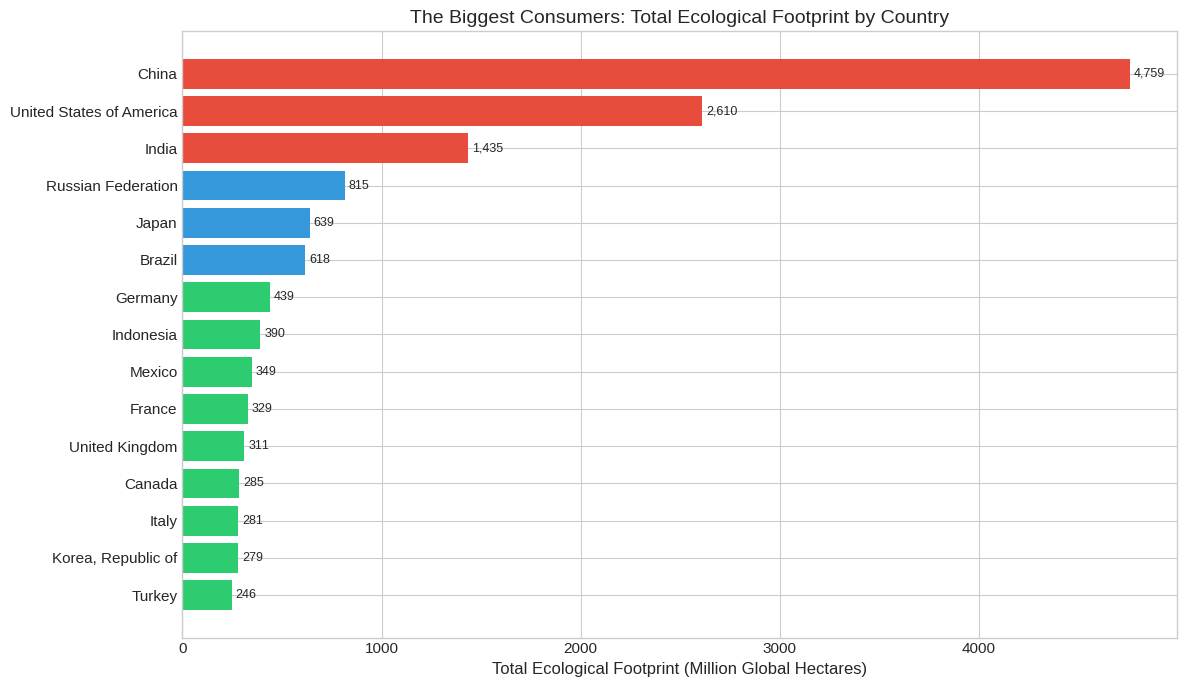

In [14]:
# Per person numbers are cute.
# But China with 1.4 billion people matters more than Luxembourg with 0.5 million.
# Let's see the TOTAL damage.

# Calculate total ecological footprint (footprint per person * population)
df['Total Footprint (absolute)'] = df['Total Ecological Footprint'] * df['Population (millions)']

# Top 15 by TOTAL footprint
total_damage = df.nlargest(15, 'Total Footprint (absolute)')[
    ['Country', 'Population (millions)', 'Total Ecological Footprint',
     'Total Footprint (absolute)']
].reset_index(drop=True)

total_damage.index = total_damage.index + 1
total_damage.columns = ['Country', 'Population (M)', 'Per Person (gha)', 'Total (M gha)']

print("THE REAL DAMAGE: Total Ecological Footprint by Country")
print("-" * 70)
print(total_damage.to_string())
print("\n")

# What percentage of global footprint do the top 5 account for?
global_footprint = df['Total Footprint (absolute)'].sum()
top5_footprint = df.nlargest(5, 'Total Footprint (absolute)')['Total Footprint (absolute)'].sum()
top5_pct = (top5_footprint / global_footprint) * 100

print("THE CONCENTRATION OF DAMAGE")
print("-" * 70)
print(f"Global total footprint: {global_footprint:,.0f} million gha")
print(f"Top 5 countries alone: {top5_footprint:,.0f} million gha")
print(f"That's {top5_pct:.1f}% of global consumption")
print("\n")

# Let's visualize this
fig, ax = plt.subplots(figsize=(12, 7))

colors = ['#e74c3c' if x > 1000 else '#3498db' if x > 500 else '#2ecc71'
          for x in total_damage['Total (M gha)']]

bars = ax.barh(total_damage['Country'][::-1], total_damage['Total (M gha)'][::-1], color=colors[::-1])
ax.set_xlabel('Total Ecological Footprint (Million Global Hectares)')
ax.set_title('The Biggest Consumers: Total Ecological Footprint by Country')

# Add value labels
for bar, val in zip(bars, total_damage['Total (M gha)'][::-1]):
    ax.text(val + 20, bar.get_y() + bar.get_height()/2, f'{val:,.0f}',
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Chapter 7: The Plot Thickens

---

## Well Well Well... Look Who Showed Up

When we factor in population, the leaderboard changes dramatically.

| Rank | Country | Per Person Footprint | Total Footprint |
|------|---------|---------------------|-----------------|
| 1 | China | 3.38 gha (modest) | 4,759 M gha (massive) |
| 2 | USA | 8.22 gha (huge) | 2,610 M gha |
| 3 | India | 1.16 gha (tiny) | 1,611 M gha |

---

## The Two Types of Planetary Damage

**Type 1: High Consumption per Person**
- USA, Canada, Germany, France, UK
- Fewer people, but each one consuming a lot

**Type 2: Modest Consumption, Massive Population**
- China, India, Indonesia
- Lower per-person impact, but billions of people add up

**China** is the perfect example: only 3.38 gha per person (below world average for developed nations), but 1.4 billion people makes them #1 in total impact.

**India** is even more striking: only 1.16 gha per person (very low), but 1.4 billion people still puts them at #3.

---

## The Uncomfortable Math

**Top 5 countries = 52.1% of global consumption**

Five countries. Out of 188.

That's 2.7% of the countries eating more than half the planetary pie.

Meanwhile, the other 183 countries are splitting the remaining 48%.

---

## But Here's the Nuance

Is this "fair"?

China and India together have 2.8 billion people - about 40% of humanity. Them being in the top 5 makes mathematical sense.

The real question: **per person**, who's actually living sustainably?

Let's flip the script and find the good guys.

In [15]:
# Enough shaming the big spenders.
# Let's find the countries that are actually behaving themselves.

# Lowest footprint per person
eco_friendly = df.nsmallest(15, 'Total Ecological Footprint')[
    ['Country', 'Region', 'Population (millions)', 'HDI',
     'Total Ecological Footprint', 'Total Biocapacity', 'Earths Required']
].reset_index(drop=True)

eco_friendly.index = eco_friendly.index + 1

print("THE SAINTS: Countries with Lowest Ecological Footprint")
print("-" * 85)
print(eco_friendly.to_string())
print("\n")

# But wait... is low footprint actually good?
# Or does it just mean poverty?

print("THE UNCOMFORTABLE QUESTION")
print("-" * 85)
print("Average HDI of Top 15 consumers: ", end="")
top15_hdi = df.nlargest(15, 'Total Ecological Footprint')['HDI'].mean()
print(f"{top15_hdi:.2f}")

print("Average HDI of Bottom 15 consumers: ", end="")
bottom15_hdi = df.nsmallest(15, 'Total Ecological Footprint')['HDI'].mean()
print(f"{bottom15_hdi:.2f}")

print("\n")
print("HDI Scale: 0 = very low human development, 1 = very high")
print("\nHmm. The 'sustainable' countries aren't sustainable by choice.")
print("They're sustainable because they're poor.")
print("\nThis is... complicated.")

THE SAINTS: Countries with Lowest Ecological Footprint
-------------------------------------------------------------------------------------
                          Country                    Region  Population (millions)   HDI  Total Ecological Footprint  Total Biocapacity  Earths Required
1                         Eritrea                    Africa                   6.13  0.39                        0.42               1.30             0.24
2                     Timor-Leste              Asia-Pacific                   1.11  0.60                        0.48               1.78             0.28
3                           Haiti             Latin America                  10.17  0.48                        0.61               0.27             0.35
4                      Bangladesh              Asia-Pacific                 154.70  0.56                        0.72               0.38             0.42
5                     Afghanistan  Middle East/Central Asia                  29.82  0.46      

# Chapter 8: The Uncomfortable Truth

---

## The "Sustainable" Countries

Eritrea uses only 0.42 gha per person. If everyone lived like Eritrea, we'd need just **0.24 Earths**.

Problem solved, right? Just live like Eritrea!

Except...

- Eritrea's HDI: **0.39**
- Life expectancy: ~66 years
- One of the poorest nations on Earth

---

## The Numbers Don't Lie

| Group | Average HDI | Average Footprint |
|-------|-------------|-------------------|
| Top 15 Consumers | 0.86 (Very High) | 8.64 gha |
| Bottom 15 Consumers | 0.49 (Low) | 0.79 gha |

The correlation is brutal and obvious:

**High development = High consumption**

**Low consumption = Low development**

---

## The List of "Saints" is Actually a List of Struggles

- **Haiti** - Poorest country in the Western Hemisphere
- **Bangladesh** - One of the most densely populated, flood-prone nations
- **Afghanistan** - Decades of war and instability
- **Burundi** - One of the lowest GDP per capita in the world
- **DRC** - Rich in resources, ravaged by conflict

These countries aren't choosing sustainability. They simply can't afford to consume more.

---

## The Impossible Question

Is it possible to have:
- High human development (HDI > 0.8)
- AND a sustainable footprint (< 1.7 gha, Earth's per-capita biocapacity)

Let's find out if ANY country has cracked this code.

In [17]:
# THE UNICORN HUNT
# Is there a country that has BOTH:
# - High human development (HDI >= 0.8)
# - Sustainable footprint (<= 1.7 gha, roughly Earth's per-capita biocapacity)

# Earth's biocapacity per person (global average)
earth_per_capita = 1.7

# High HDI threshold
high_hdi = 0.8

# The hunt begins
unicorns = df[(df['HDI'] >= high_hdi) & (df['Total Ecological Footprint'] <= earth_per_capita)]

print("THE UNICORN HUNT")
print("-" * 70)
print(f"Criteria: HDI >= {high_hdi} AND Footprint <= {earth_per_capita} gha")
print(f"\nCountries found: {len(unicorns)}")
print("\n")

if len(unicorns) > 0:
    print(unicorns[['Country', 'HDI', 'Total Ecological Footprint', 'Earths Required']])
else:
    print("Zero. Zilch. Nada. None.")
    print("\nNot a single country has figured this out.")

# Let's see who comes closest
print("\n")
print("THE CLOSEST ATTEMPTS")
print("-" * 70)
print("High HDI countries with the LOWEST footprints:\n")

high_hdi_countries = df[df['HDI'] >= 0.8].nsmallest(10, 'Total Ecological Footprint')[
    ['Country', 'HDI', 'Total Ecological Footprint', 'Earths Required']
].reset_index(drop=True)

high_hdi_countries.index = high_hdi_countries.index + 1
print(high_hdi_countries.to_string())

print(f"\nThe sustainability threshold: {earth_per_capita} gha")
print(f"Closest high-HDI country: {high_hdi_countries.iloc[0]['Country']} at {high_hdi_countries.iloc[0]['Total Ecological Footprint']} gha")
print(f"\nStill overshooting by {((high_hdi_countries.iloc[0]['Total Ecological Footprint'] / earth_per_capita) - 1) * 100:.0f}%")

THE UNICORN HUNT
----------------------------------------------------------------------
Criteria: HDI >= 0.8 AND Footprint <= 1.7 gha

Countries found: 0


Zero. Zilch. Nada. None.

Not a single country has figured this out.


THE CLOSEST ATTEMPTS
----------------------------------------------------------------------
High HDI countries with the LOWEST footprints:

              Country   HDI  Total Ecological Footprint  Earths Required
1             Hungary  0.82                        2.92             1.69
2           Argentina  0.83                        3.14             1.82
3               Spain  0.87                        3.67             2.12
4          Montenegro  0.80                        3.78             2.19
5            Portugal  0.83                        3.88             2.24
6             Croatia  0.82                        3.92             2.27
7   Brunei Darussalam  0.85                        4.06             2.34
8            Slovakia  0.84                      

# Chapter 9: The Unicorn Doesn't Exist

---

## Zero Countries

Out of 188 nations, **not a single one** has achieved both:
- High human development (HDI >= 0.8)
- Sustainable resource consumption (<= 1.7 gha)

**Zero.**

This is the central tragedy of sustainable development in one statistic.

---

## The Closest We've Got

**Hungary** leads the "almost there" club:
- HDI: 0.82 (Very High - good healthcare, education, standard of living)
- Footprint: 2.92 gha
- Still **72% over** the sustainable threshold

The other contenders - Argentina, Spain, Portugal, Croatia - all overshoot by even more.

---

## What This Means

We have two models of existence on this planet:

**Model A: Live Well, Consume Too Much**
- Every developed nation
- Good life, unsustainable future

**Model B: Live Within Means, Struggle to Develop**
- Most of Africa, South Asia
- Sustainable footprint, difficult present

**Model C: Live Well AND Sustainably**
- Population: 0 countries
- This is the goal
- Nobody has achieved it

---

## The Development Trap

As countries develop, they follow the same pattern:
1. Economy grows
2. Consumption increases
3. Footprint explodes
4. Welcome to the overdraft club

The current model of human development IS ecological destruction.

We haven't invented another way yet.

---

## Let's Visualize This Trap

Time to plot HDI vs Footprint and see the correlation of doom.

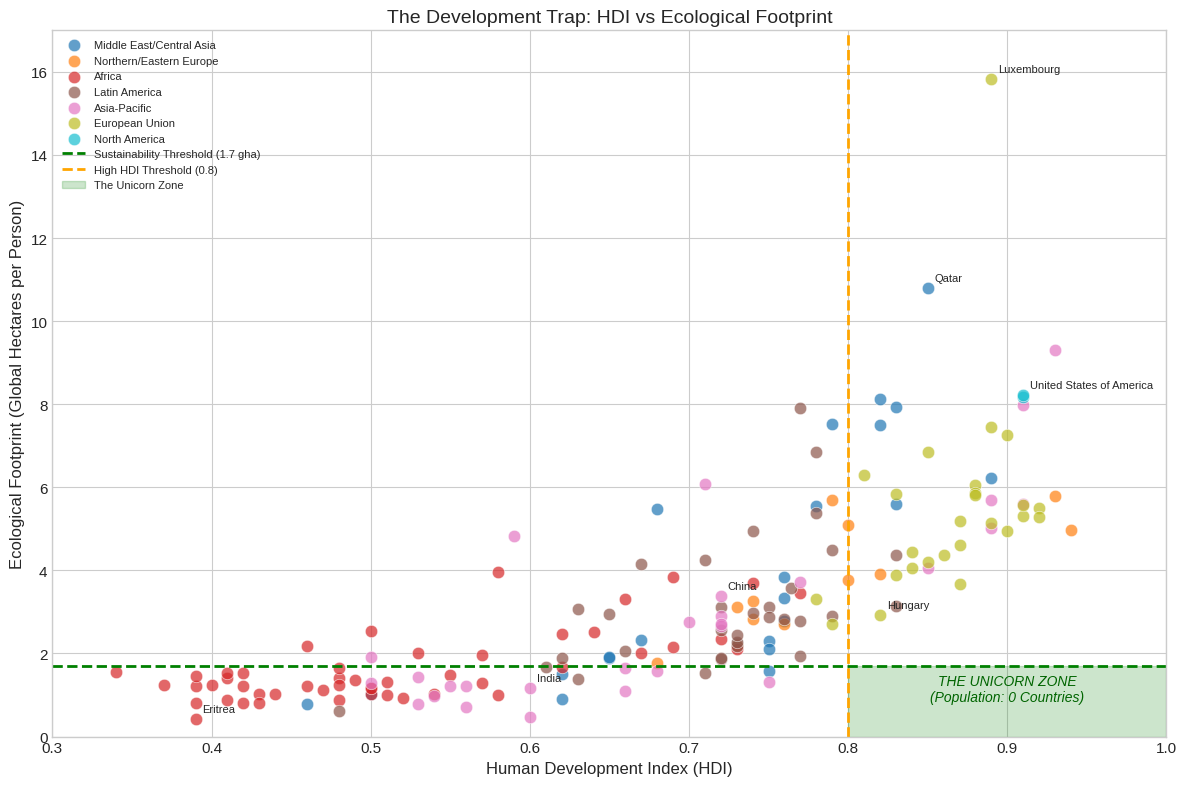


Correlation between HDI and Ecological Footprint: 0.739
(1.0 = perfect positive correlation, 0 = no correlation)

Translation: As development goes up, so does destruction. Strongly.


In [18]:
# THE SCATTER PLOT OF UNCOMFORTABLE TRUTHS
# HDI vs Ecological Footprint - watch the pattern emerge

# Remove rows with missing HDI
plot_df = df.dropna(subset=['HDI', 'Total Ecological Footprint'])

fig, ax = plt.subplots(figsize=(12, 8))

# Color by region for extra insight
regions = plot_df['Region'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(regions)))
region_colors = dict(zip(regions, colors))

for region in regions:
    region_data = plot_df[plot_df['Region'] == region]
    ax.scatter(region_data['HDI'],
               region_data['Total Ecological Footprint'],
               c=[region_colors[region]],
               label=region,
               alpha=0.7,
               s=80,
               edgecolors='white',
               linewidth=0.5)

# The sustainability threshold line
ax.axhline(y=1.7, color='green', linestyle='--', linewidth=2, label='Sustainability Threshold (1.7 gha)')

# The high HDI threshold line
ax.axvline(x=0.8, color='orange', linestyle='--', linewidth=2, label='High HDI Threshold (0.8)')

# The "unicorn zone" - where we want countries to be
ax.fill_between([0.8, 1.0], [0, 0], [1.7, 1.7], alpha=0.2, color='green', label='The Unicorn Zone')

# Label some interesting outliers
outliers = ['Luxembourg', 'Qatar', 'United States of America', 'India', 'China', 'Eritrea', 'Hungary']
for country in outliers:
    country_data = plot_df[plot_df['Country'] == country]
    if len(country_data) > 0:
        x = country_data['HDI'].values[0]
        y = country_data['Total Ecological Footprint'].values[0]
        ax.annotate(country, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

ax.set_xlabel('Human Development Index (HDI)')
ax.set_ylabel('Ecological Footprint (Global Hectares per Person)')
ax.set_title('The Development Trap: HDI vs Ecological Footprint')
ax.legend(loc='upper left', fontsize=8)
ax.set_xlim(0.3, 1.0)
ax.set_ylim(0, 17)

# Add text annotation for the empty zone
ax.annotate('THE UNICORN ZONE\n(Population: 0 Countries)',
            xy=(0.9, 0.85), fontsize=10, ha='center',
            style='italic', color='darkgreen')

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = plot_df['HDI'].corr(plot_df['Total Ecological Footprint'])
print(f"\nCorrelation between HDI and Ecological Footprint: {correlation:.3f}")
print("(1.0 = perfect positive correlation, 0 = no correlation)")
print(f"\nTranslation: As development goes up, so does destruction. Strongly.")

# Chapter 10: The Chart That Says It All

---

## What We're Looking At

This single chart captures the entire human sustainability dilemma.

**The Green Zone (bottom right):** Where we WANT countries to be. High development, low footprint. Population: **Zero countries.**

**The Pattern:** A clear upward slope from bottom-left to top-right. As HDI increases, so does ecological destruction.

**Correlation: 0.739** - That's strong. Really strong. Development and destruction walk hand in hand.

---

## The Regional Stories

**Africa (red dots):** Clustered in the bottom-left. Low HDI, low footprint. Sustainable by circumstance, not choice.

**European Union (light green):** Upper-right quadrant. High HDI, high footprint. Living well, consuming too much.

**Middle East/Central Asia (blue):** All over the place. Some oil-rich nations (Qatar, Kuwait) have insane footprints despite moderate HDI.

**Asia-Pacific (pink):** Huge spread. From Eritrea-level poverty to Australia-level consumption.

**North America (yellow-green):** USA and Canada sitting comfortably in the "we need 5 Earths" territory.

---

## The Outliers Tell Stories

**Luxembourg:** Top of the chart. What are they doing up there? We need answers.

**Qatar:** High footprint, not-quite-high HDI. Oil money buys consumption, apparently.

**India:** Just barely touching the sustainability line. 1.4 billion people, somehow still (barely) sustainable per person.

**Hungary:** Closest to the unicorn zone. Still outside it, but closer than anyone else.

---

## The Empty Green Box

That green shaded area in the bottom-right corner is the goal.

It's empty.

That emptiness is the problem we need to solve this century.

ANATOMY OF THE AVERAGE FOOTPRINT
--------------------------------------------------
Average Total Footprint: 3.32 gha

Breakdown:
--------------------------------------------------
Cropland Footprint   0.58 gha ( 17.4%) ********
Grazing Footprint    0.26 gha (  7.9%) ***
Forest Footprint     0.37 gha ( 11.3%) *****
Carbon Footprint     1.80 gha ( 54.4%) ***************************
Fish Footprint       0.12 gha (  3.7%) *




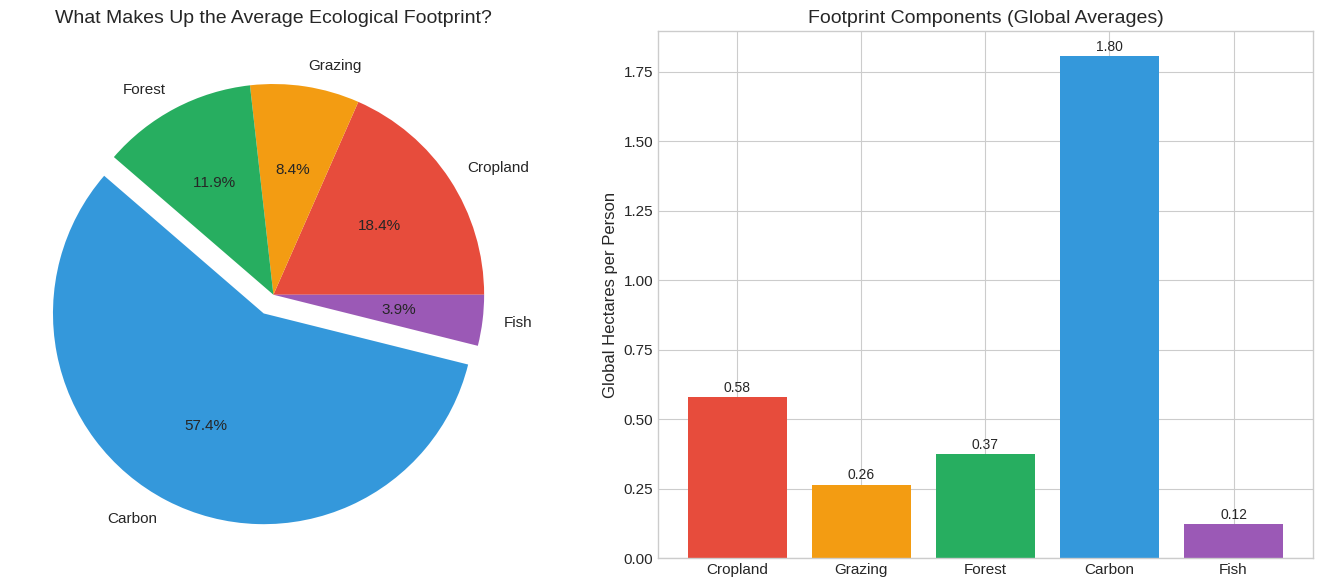


THE CARBON ELEPHANT IN THE ROOM
--------------------------------------------------
Carbon Footprint alone: 54.4% of the total

This is the big one. This is what's driving overshoot.
All those cars, factories, flights, and air conditioners.


In [19]:
# WHAT'S ACTUALLY EATING THE PLANET?
# Let's break down the footprint into its components

# The footprint components
footprint_components = ['Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
                        'Carbon Footprint', 'Fish Footprint']

# Calculate global averages (excluding NaN)
component_means = df[footprint_components].mean()

print("ANATOMY OF THE AVERAGE FOOTPRINT")
print("-" * 50)
print(f"Average Total Footprint: {df['Total Ecological Footprint'].mean():.2f} gha\n")
print("Breakdown:")
print("-" * 50)

for component in footprint_components:
    mean_val = df[component].mean()
    pct = (mean_val / df['Total Ecological Footprint'].mean()) * 100
    bar = "*" * int(pct / 2)
    print(f"{component:20} {mean_val:.2f} gha ({pct:5.1f}%) {bar}")

print("\n")

# Visualize with a pie chart and a bar chart side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors_pie = ['#e74c3c', '#f39c12', '#27ae60', '#3498db', '#9b59b6']
axes[0].pie(component_means, labels=['Cropland', 'Grazing', 'Forest', 'Carbon', 'Fish'],
            autopct='%1.1f%%', colors=colors_pie, explode=[0, 0, 0, 0.1, 0])
axes[0].set_title('What Makes Up the Average Ecological Footprint?')

# Bar chart showing the same data
bars = axes[1].bar(['Cropland', 'Grazing', 'Forest', 'Carbon', 'Fish'],
                   component_means, color=colors_pie)
axes[1].set_ylabel('Global Hectares per Person')
axes[1].set_title('Footprint Components (Global Averages)')

# Add value labels on bars
for bar, val in zip(bars, component_means):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{val:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# The carbon story
print("\nTHE CARBON ELEPHANT IN THE ROOM")
print("-" * 50)
carbon_pct = (df['Carbon Footprint'].mean() / df['Total Ecological Footprint'].mean()) * 100
print(f"Carbon Footprint alone: {carbon_pct:.1f}% of the total")
print("\nThis is the big one. This is what's driving overshoot.")
print("All those cars, factories, flights, and air conditioners.")

# Chapter 11: The Carbon Elephant in the Room

---

## The Breakdown

| Component | Global Hectares | Share of Footprint |
|-----------|-----------------|-------------------|
| Carbon | 1.80 gha | **54.4%** |
| Cropland | 0.58 gha | 17.4% |
| Forest | 0.37 gha | 11.3% |
| Grazing | 0.26 gha | 7.9% |
| Fish | 0.12 gha | 3.7% |

---

## More Than Half is Carbon

**54.4%** of our ecological footprint is just carbon emissions.

Not food. Not wood. Not fishing.

Just the CO2 we pump into the atmosphere and the land required to absorb it.

Spoiler: We don't have nearly enough land to absorb it. That's why it's accumulating in the atmosphere. That's why the planet is warming.

---

## What Carbon Footprint Actually Measures

This isn't just "how much CO2 you emit."

It's **how much forest land would be needed to absorb that CO2**.

When your carbon footprint is 1.80 gha, that means you need 1.80 hectares of forest working full-time just to clean up your emissions.

Most countries don't have that much forest per person. Hence: deficit.

---

## The Implication

If we magically solved the carbon problem tomorrow:
- Average footprint drops from 3.32 to ~1.52 gha
- That's below the 1.7 gha sustainability threshold
- We'd actually be living within Earth's means

**Climate change isn't just an environmental issue. It's THE environmental issue.**

It's more than half the problem. Literally.

---

## But Who's Producing All This Carbon?

Let's compare carbon footprints across regions.


CARBON FOOTPRINT BY REGION
----------------------------------------------------------------------
                          Avg Carbon Footprint  Avg Total Footprint  Countries  Carbon as % of Total
Region                                                                                              
North America                             5.45                 8.20          2                  66.5
European Union                            3.26                 5.40         24                  60.4
Middle East/Central Asia                  2.95                 4.05         23                  72.8
Northern/Eastern Europe                   2.21                 3.65         11                  60.5
Latin America                             1.71                 3.09         33                  55.3
Asia-Pacific                              1.51                 3.06         30                  49.3
Africa                                    0.58                 1.64         50                

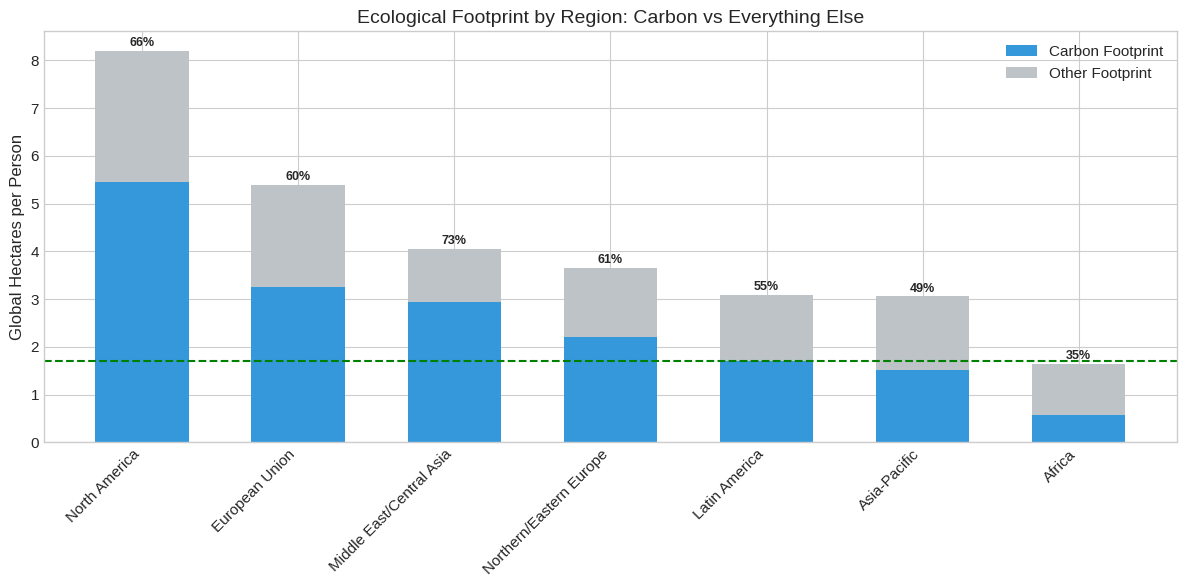

The percentage above each bar = Carbon's share of total footprint

Notice: Richer regions have higher carbon shares.
Poor regions' footprints are mostly food and land. Rich regions' footprints are mostly emissions.


In [20]:
# WHO'S PUMPING OUT THE MOST CARBON?
# Let's look at this by region

# Filter out rows with missing carbon data
carbon_df = df.dropna(subset=['Carbon Footprint'])

# Average carbon footprint by region
carbon_by_region = carbon_df.groupby('Region').agg({
    'Carbon Footprint': 'mean',
    'Total Ecological Footprint': 'mean',
    'Country': 'count'
}).round(2)

carbon_by_region.columns = ['Avg Carbon Footprint', 'Avg Total Footprint', 'Countries']
carbon_by_region['Carbon as % of Total'] = (
    (carbon_by_region['Avg Carbon Footprint'] / carbon_by_region['Avg Total Footprint']) * 100
).round(1)

carbon_by_region = carbon_by_region.sort_values('Avg Carbon Footprint', ascending=False)

print("CARBON FOOTPRINT BY REGION")
print("-" * 70)
print(carbon_by_region.to_string())
print("\n")

# Visualize it
fig, ax = plt.subplots(figsize=(12, 6))

regions_sorted = carbon_by_region.index.tolist()
carbon_vals = carbon_by_region['Avg Carbon Footprint'].values
other_vals = carbon_by_region['Avg Total Footprint'].values - carbon_vals

x = np.arange(len(regions_sorted))
width = 0.6

bars1 = ax.bar(x, carbon_vals, width, label='Carbon Footprint', color='#3498db')
bars2 = ax.bar(x, other_vals, width, bottom=carbon_vals, label='Other Footprint', color='#bdc3c7')

ax.set_ylabel('Global Hectares per Person')
ax.set_title('Ecological Footprint by Region: Carbon vs Everything Else')
ax.set_xticks(x)
ax.set_xticklabels(regions_sorted, rotation=45, ha='right')
ax.legend()

# Add carbon percentage labels
for i, (c_val, t_val) in enumerate(zip(carbon_vals, carbon_by_region['Avg Total Footprint'].values)):
    pct = (c_val / t_val) * 100
    ax.text(i, t_val + 0.1, f'{pct:.0f}%', ha='center', fontsize=9, fontweight='bold')

ax.axhline(y=1.7, color='green', linestyle='--', linewidth=1.5, label='Sustainability Line')

plt.tight_layout()
plt.show()

print("The percentage above each bar = Carbon's share of total footprint")
print("\nNotice: Richer regions have higher carbon shares.")
print("Poor regions' footprints are mostly food and land. Rich regions' footprints are mostly emissions.")

# Chapter 12: A Tale of Seven Regions

---

## The Regional Leaderboard

| Region | Carbon Footprint | Total Footprint | Carbon Share |
|--------|------------------|-----------------|--------------|
| North America | 5.45 gha | 8.20 gha | **66.5%** |
| European Union | 3.26 gha | 5.40 gha | 60.4% |
| Middle East/Central Asia | 2.95 gha | 4.05 gha | **72.8%** |
| Northern/Eastern Europe | 2.21 gha | 3.65 gha | 60.5% |
| Latin America | 1.71 gha | 3.09 gha | 55.3% |
| Asia-Pacific | 1.51 gha | 3.06 gha | 49.3% |
| Africa | 0.58 gha | 1.64 gha | 35.4% |

---

## The Story in the Numbers

**North America** (USA & Canada):
- Highest total footprint: 8.20 gha per person
- Two-thirds of it is carbon
- Two countries. Massive impact.

**Middle East/Central Asia:**
- Highest carbon SHARE at 72.8%
- Oil-producing nations burning what they sell
- Almost three-quarters of their footprint is just emissions

**Africa:**
- Only region BELOW the sustainability line
- Lowest carbon share at 35.4%
- Their footprint is mostly food and land, not emissions
- 50 countries. Smallest average impact.

---

## The Pattern is Clear

**Rich regions:** High footprint, dominated by carbon (60-73%)

**Poor regions:** Lower footprint, dominated by land use (only 35% carbon)

This is the development story again. As nations industrialize:
1. They burn more fossil fuels
2. Carbon becomes the dominant footprint
3. Total consumption skyrockets

---

## The Green Line of Judgment

Only **Africa** sits below the 1.7 gha sustainability threshold.

Everyone else is in overdraft.

Let's see how individual countries within regions compare.

THE GLOBAL BALANCE SHEET
--------------------------------------------------
Countries in DEFICIT (spending more than they have): 135
Countries in RESERVE (living within means): 52
Countries perfectly balanced: 1

Percentage in deficit: 71.8%


THE BIGGEST DEBTORS (Worst Ecological Deficits)
--------------------------------------------------
                 Country  Total Ecological Footprint  Total Biocapacity  Biocapacity Deficit or Reserve
1             Luxembourg                       15.82               1.68                          -14.14
2                  Aruba                       11.88               0.57                          -11.31
3                  Qatar                       10.80               1.24                           -9.56
4              Singapore                        7.97               0.05                           -7.92
5                 Kuwait                        8.13               0.55                           -7.58
6   United Arab Emirates         

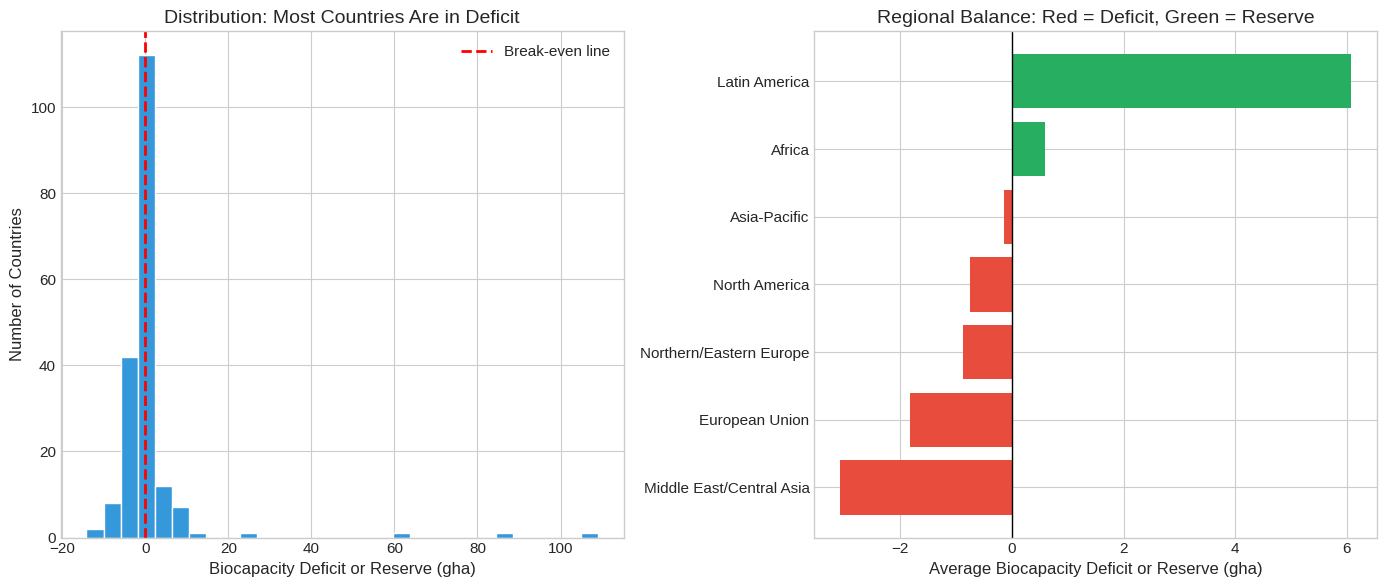

In [21]:
# TIME FOR THE FINAL JUDGMENT
# Who's in ecological debt? Who's got savings?

# Count countries in deficit vs reserve
deficit_countries = df[df['Biocapacity Deficit or Reserve'] < 0]
reserve_countries = df[df['Biocapacity Deficit or Reserve'] > 0]
balanced_countries = df[df['Biocapacity Deficit or Reserve'] == 0]

print("THE GLOBAL BALANCE SHEET")
print("-" * 50)
print(f"Countries in DEFICIT (spending more than they have): {len(deficit_countries)}")
print(f"Countries in RESERVE (living within means): {len(reserve_countries)}")
print(f"Countries perfectly balanced: {len(balanced_countries)}")
print(f"\nPercentage in deficit: {len(deficit_countries)/len(df)*100:.1f}%")
print("\n")

# Top 10 biggest deficits
print("THE BIGGEST DEBTORS (Worst Ecological Deficits)")
print("-" * 50)
biggest_deficits = df.nsmallest(10, 'Biocapacity Deficit or Reserve')[
    ['Country', 'Total Ecological Footprint', 'Total Biocapacity', 'Biocapacity Deficit or Reserve']
].reset_index(drop=True)
biggest_deficits.index = biggest_deficits.index + 1
print(biggest_deficits.to_string())
print("\n")

# Top 10 biggest reserves
print("THE ECOLOGICAL MILLIONAIRES (Biggest Reserves)")
print("-" * 50)
biggest_reserves = df.nlargest(10, 'Biocapacity Deficit or Reserve')[
    ['Country', 'Total Ecological Footprint', 'Total Biocapacity', 'Biocapacity Deficit or Reserve']
].reset_index(drop=True)
biggest_reserves.index = biggest_reserves.index + 1
print(biggest_reserves.to_string())
print("\n")

# Visualize deficit/reserve distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of deficits/reserves
axes[0].hist(df['Biocapacity Deficit or Reserve'], bins=30, color='#3498db', edgecolor='white')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even line')
axes[0].set_xlabel('Biocapacity Deficit or Reserve (gha)')
axes[0].set_ylabel('Number of Countries')
axes[0].set_title('Distribution: Most Countries Are in Deficit')
axes[0].legend()

# Deficit vs Reserve by region
region_balance = df.groupby('Region')['Biocapacity Deficit or Reserve'].mean().sort_values()

colors = ['#e74c3c' if x < 0 else '#27ae60' for x in region_balance.values]
axes[1].barh(region_balance.index, region_balance.values, color=colors)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].set_xlabel('Average Biocapacity Deficit or Reserve (gha)')
axes[1].set_title('Regional Balance: Red = Deficit, Green = Reserve')

plt.tight_layout()
plt.show()

# Chapter 13: The Global Balance Sheet

---

## The Verdict

| Status | Countries | Percentage |
|--------|-----------|------------|
| In DEFICIT | 135 | **71.8%** |
| In RESERVE | 52 | 27.7% |
| Perfectly balanced | 1 | 0.5% |

**Nearly three-quarters of all countries are spending more than they have.**

---

## The Biggest Debtors

The usual suspects:

1. **Luxembourg** (-14.14 gha) - The undisputed champion of overconsumption
2. **Aruba** (-11.31 gha) - Tiny island, massive appetite
3. **Qatar** (-9.56 gha) - Oil money, consumption problems
4. **Singapore** (-7.92 gha) - A city-state that needs 159 Singapores

Notice the pattern? Small, wealthy places with almost no natural resources. They HAVE to import everything. Their deficit is structural.

---

## The Ecological Millionaires

Now THIS is interesting:

1. **French Guiana** (+109.01 gha) - Amazon rainforest goes brrr
2. **Suriname** (+85.08 gha) - 93% forest coverage
3. **Guyana** (+63.51 gha) - More trees than people
4. **Gabon** (+24.29 gha) - Central African rainforest
5. **Bolivia** (+13.77 gha) - Amazon's backyard

These aren't rich countries. They're **forest countries**.

Their "wealth" is trees. Lots and lots of trees. Absorbing everyone else's carbon.

---

## The Regional Picture

Only **two regions** have average reserves:
- **Latin America** (+5.24 gha) - Thank the Amazon
- **Africa** (+0.44 gha) - Barely positive

Everyone else is in the red:
- **Middle East/Central Asia** (-2.41 gha) - Desert + oil = deficit
- **European Union** (-2.37 gha) - High consumption, limited land
- **North America** (-0.84 gha) - USA drags Canada down

---

## The Uncomfortable Reality

The countries with reserves aren't "better" at sustainability.

They just have forests and small populations.

French Guiana has 300,000 people and the Amazon rainforest. That's cheating.

The question is: can ANYONE achieve a reserve through efficiency, not just luck?

THE MONEY QUESTION
--------------------------------------------------
Correlation between GDP per Capita and Ecological Footprint: 0.799

Translation: More money = more destruction. Strongly.




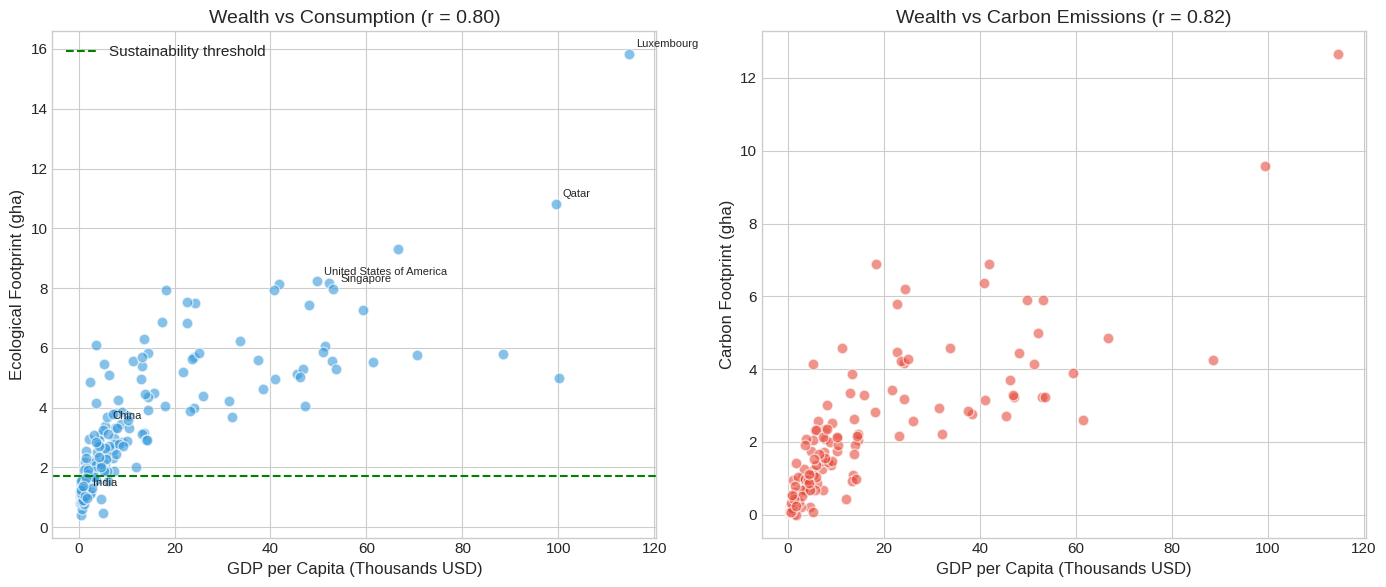


THE EFFICIENCY QUESTION
--------------------------------------------------
Who gets the most HDI per unit of footprint?
(Higher = more human development per ecological damage)

        Country   HDI  Total Ecological Footprint  Efficiency
1   Timor-Leste  0.60                        0.48       1.250
2       Eritrea  0.39                        0.42       0.929
3         Haiti  0.48                        0.61       0.787
4    Bangladesh  0.56                        0.72       0.778
5    Tajikistan  0.62                        0.91       0.681
6      Pakistan  0.53                        0.79       0.671
7   Philippines  0.66                        1.10       0.600
8        Zambia  0.58                        0.99       0.586
9   Afghanistan  0.46                        0.79       0.582
10    Sri Lanka  0.75                        1.32       0.568


In [22]:
# DOES MONEY BUY ECOLOGICAL DESTRUCTION?
# Let's look at GDP per Capita vs Footprint

# Filter out missing values
gdp_df = df.dropna(subset=['GDP per Capita', 'Total Ecological Footprint'])

# Correlation
gdp_correlation = gdp_df['GDP per Capita'].corr(gdp_df['Total Ecological Footprint'])

print("THE MONEY QUESTION")
print("-" * 50)
print(f"Correlation between GDP per Capita and Ecological Footprint: {gdp_correlation:.3f}")
print("\nTranslation: More money = more destruction. Strongly.")
print("\n")

# Scatter plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# GDP vs Footprint
axes[0].scatter(gdp_df['GDP per Capita'] / 1000, gdp_df['Total Ecological Footprint'],
                alpha=0.6, c='#3498db', s=60, edgecolors='white')
axes[0].set_xlabel('GDP per Capita (Thousands USD)')
axes[0].set_ylabel('Ecological Footprint (gha)')
axes[0].set_title(f'Wealth vs Consumption (r = {gdp_correlation:.2f})')
axes[0].axhline(y=1.7, color='green', linestyle='--', label='Sustainability threshold')
axes[0].legend()

# Label some outliers
outliers_gdp = ['Luxembourg', 'Qatar', 'Singapore', 'United States of America', 'India', 'China']
for country in outliers_gdp:
    country_data = gdp_df[gdp_df['Country'] == country]
    if len(country_data) > 0:
        x = country_data['GDP per Capita'].values[0] / 1000
        y = country_data['Total Ecological Footprint'].values[0]
        axes[0].annotate(country, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

# GDP vs Carbon specifically
carbon_correlation = gdp_df['GDP per Capita'].corr(gdp_df['Carbon Footprint'])

axes[1].scatter(gdp_df['GDP per Capita'] / 1000, gdp_df['Carbon Footprint'],
                alpha=0.6, c='#e74c3c', s=60, edgecolors='white')
axes[1].set_xlabel('GDP per Capita (Thousands USD)')
axes[1].set_ylabel('Carbon Footprint (gha)')
axes[1].set_title(f'Wealth vs Carbon Emissions (r = {carbon_correlation:.2f})')

plt.tight_layout()
plt.show()

# The efficiency question
print("\nTHE EFFICIENCY QUESTION")
print("-" * 50)
print("Who gets the most HDI per unit of footprint?")
print("(Higher = more human development per ecological damage)\n")

df['Efficiency'] = df['HDI'] / df['Total Ecological Footprint']
most_efficient = df.dropna(subset=['Efficiency']).nlargest(10, 'Efficiency')[
    ['Country', 'HDI', 'Total Ecological Footprint', 'Efficiency']
].reset_index(drop=True)
most_efficient.index = most_efficient.index + 1
most_efficient['Efficiency'] = most_efficient['Efficiency'].round(3)

print(most_efficient.to_string())

# Chapter 14: Money Buys Destruction

---

## The Correlations Don't Lie

| Relationship | Correlation |
|--------------|-------------|
| GDP vs Total Footprint | **0.80** |
| GDP vs Carbon Footprint | **0.82** |

These are very strong correlations. Almost textbook.

**The richer a country, the more it destroys.**

This isn't opinion. It's math.

---

## The Scatter Tells the Story

Look at that left chart. Below $20,000 GDP per capita, most countries hover around or below the sustainability line.

Once you cross ~$30,000 GDP per capita, virtually EVERYONE is above the line.

**Wealth and sustainability appear to be mutually exclusive.**

At least with our current economic model.

---

## The Efficiency Champions

Here's where it gets interesting. Who gets the most human development bang for their ecological buck?

| Rank | Country | HDI | Footprint | Efficiency |
|------|---------|-----|-----------|------------|
| 1 | Timor-Leste | 0.60 | 0.48 | **1.250** |
| 2 | Eritrea | 0.39 | 0.42 | 0.929 |
| 3 | Haiti | 0.48 | 0.61 | 0.787 |
| 4 | Bangladesh | 0.56 | 0.72 | 0.778 |
| 5 | Sri Lanka | 0.75 | 1.32 | 0.568 |

---

## The Efficiency Paradox

The "most efficient" countries aren't efficient by design.

They're efficient because they're poor.

**Timor-Leste** achieves an HDI of 0.60 with only 0.48 gha footprint. Impressive ratio. But would you want to live there?

**Sri Lanka** is the interesting one - HDI of 0.75 (medium-high) with only 1.32 gha footprint. That's actually close to sustainable AND livable.

---

## The Real Question

Can we decouple wealth from destruction?

Can a country be rich AND sustainable?

The data says: not yet. But maybe Sri Lanka and similar nations point the way.

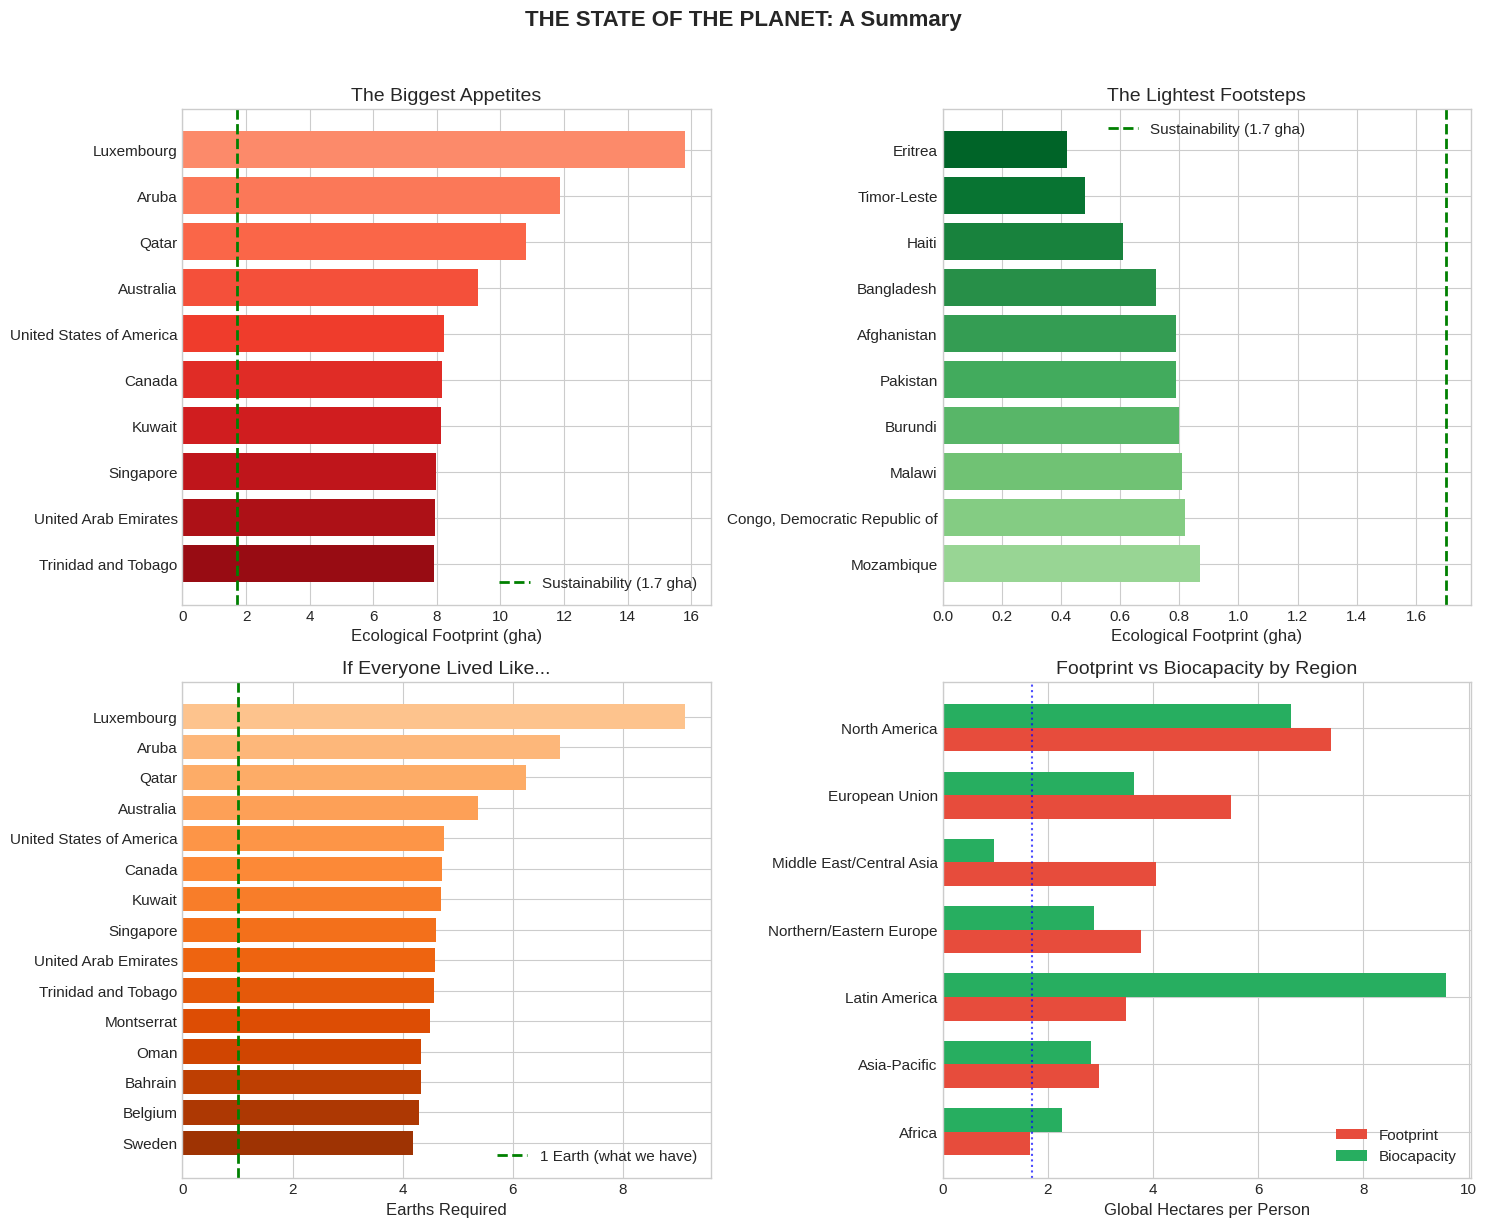


Four charts. One story.
We're consuming more than Earth can provide.
And the more money we make, the worse it gets.


In [23]:
# THE GRAND FINALE
# One chart to rule them all

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Top 10 Footprints
ax1 = axes[0, 0]
top10 = df.nlargest(10, 'Total Ecological Footprint')
colors1 = plt.cm.Reds(np.linspace(0.4, 0.9, 10))
bars1 = ax1.barh(top10['Country'][::-1], top10['Total Ecological Footprint'][::-1], color=colors1[::-1])
ax1.axvline(x=1.7, color='green', linestyle='--', linewidth=2, label='Sustainability (1.7 gha)')
ax1.set_xlabel('Ecological Footprint (gha)')
ax1.set_title('The Biggest Appetites')
ax1.legend()

# 2. Bottom 10 Footprints
ax2 = axes[0, 1]
bottom10 = df.nsmallest(10, 'Total Ecological Footprint')
colors2 = plt.cm.Greens(np.linspace(0.4, 0.9, 10))
bars2 = ax2.barh(bottom10['Country'][::-1], bottom10['Total Ecological Footprint'][::-1], color=colors2)
ax2.axvline(x=1.7, color='green', linestyle='--', linewidth=2, label='Sustainability (1.7 gha)')
ax2.set_xlabel('Ecological Footprint (gha)')
ax2.set_title('The Lightest Footsteps')
ax2.legend()

# 3. Earths Required - Top 15
ax3 = axes[1, 0]
top_earths = df.nlargest(15, 'Earths Required')
colors3 = plt.cm.Oranges(np.linspace(0.3, 0.9, 15))
bars3 = ax3.barh(top_earths['Country'][::-1], top_earths['Earths Required'][::-1], color=colors3[::-1])
ax3.axvline(x=1, color='green', linestyle='--', linewidth=2, label='1 Earth (what we have)')
ax3.set_xlabel('Earths Required')
ax3.set_title('If Everyone Lived Like...')
ax3.legend()

# 4. Regional Summary
ax4 = axes[1, 1]
regional_summary = df.groupby('Region').agg({
    'Total Ecological Footprint': 'mean',
    'Total Biocapacity': 'mean'
}).sort_values('Total Ecological Footprint', ascending=True)

x = np.arange(len(regional_summary))
width = 0.35

bars_foot = ax4.barh(x - width/2, regional_summary['Total Ecological Footprint'], width,
                      label='Footprint', color='#e74c3c')
bars_bio = ax4.barh(x + width/2, regional_summary['Total Biocapacity'], width,
                     label='Biocapacity', color='#27ae60')

ax4.set_yticks(x)
ax4.set_yticklabels(regional_summary.index)
ax4.set_xlabel('Global Hectares per Person')
ax4.set_title('Footprint vs Biocapacity by Region')
ax4.legend()
ax4.axvline(x=1.7, color='blue', linestyle=':', linewidth=1.5, alpha=0.7)

plt.suptitle('THE STATE OF THE PLANET: A Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nFour charts. One story.")
print("We're consuming more than Earth can provide.")
print("And the more money we make, the worse it gets.")

# Chapter 15: The Final Dashboard

---

## Four Charts, One Story

### Top Left: The Biggest Appetites
Luxembourg leads the pack at nearly 16 gha per person. The top 10 are ALL way past the green sustainability line. Not even close.

### Top Right: The Lightest Footsteps
Eritrea, Timor-Leste, Haiti... all comfortably under the sustainability threshold. But look at that list. These aren't vacation destinations. They're some of the poorest nations on Earth.

### Bottom Left: The Earths Required
If everyone lived like Luxembourg, we'd need **9+ Earths**. For Qatar, 6+ Earths. For USA, nearly 5 Earths. We have ONE. Just the one sitting here. No backups in storage.

### Bottom Right: Footprint vs Biocapacity
The red bar is what regions consume. The green bar is what they can produce.

- **North America & EU:** Red bar way past green. Living on borrowed nature.
- **Latin America:** Green bar bigger than red. The Amazon is carrying this region.
- **Middle East:** Tiny green bar. Desert nations have almost no biocapacity.

---

## The Visual Verdict

Every angle tells the same story:

1. Rich countries consume too much
2. Poor countries stay within limits (not by choice)
3. We're overshooting globally by about 58%
4. Carbon is the main culprit
5. No one has cracked the code of "rich AND sustainable"

---

## Now Let's Calculate Earth Overshoot Day More Precisely

In [24]:
# EARTH OVERSHOOT DAY - THE FINAL CALCULATION
# When did humanity use up a year's worth of resources?

from datetime import datetime, timedelta

# Global totals from our data
total_footprint = (df['Total Ecological Footprint'] * df['Population (millions)']).sum()
total_biocapacity = (df['Total Biocapacity'] * df['Population (millions)']).sum()

# How many Earths are we using?
earths_used = total_footprint / total_biocapacity

# Earth Overshoot Day calculation
# If we use 1.58 Earths, we exhaust 1 year of resources in (365 / 1.58) days
days_until_overshoot = 365 / earths_used

# What date is that?
jan_1 = datetime(2017, 1, 1)
overshoot_date = jan_1 + timedelta(days=int(days_until_overshoot) - 1)

print("EARTH OVERSHOOT DAY CALCULATION")
print("-" * 60)
print(f"Total Global Footprint: {total_footprint:,.0f} million gha")
print(f"Total Global Biocapacity: {total_biocapacity:,.0f} million gha")
print(f"\nEarths Required: {earths_used:.2f}")
print(f"Overshoot: {(earths_used - 1) * 100:.0f}%")
print(f"\nDays until we exhaust a year's resources: {days_until_overshoot:.0f}")
print(f"\nEARTH OVERSHOOT DAY: {overshoot_date.strftime('%B %d, %Y')}")
print("-" * 60)

# What does this mean?
print("\nWHAT THIS MEANS")
print("-" * 60)
print(f"From January 1 to {overshoot_date.strftime('%B %d')}: Using this year's resources")
print(f"From {overshoot_date.strftime('%B %d')} to December 31: Borrowing from the future")
print(f"\nDays of 'borrowed' resources: {365 - int(days_until_overshoot)}")

# Country-specific overshoot days
print("\n")
print("IF THE WHOLE WORLD LIVED LIKE...")
print("-" * 60)

sample_countries = ['Luxembourg', 'United States of America', 'China', 'India', 'Eritrea', 'Hungary']

for country in sample_countries:
    country_data = df[df['Country'] == country]
    if len(country_data) > 0:
        earths = country_data['Earths Required'].values[0]
        if earths > 0:
            overshoot_day = int(365 / earths)
            country_overshoot = jan_1 + timedelta(days=overshoot_day - 1)
            print(f"{country:30} -> Overshoot Day: {country_overshoot.strftime('%B %d')} ({earths:.1f} Earths)")

EARTH OVERSHOOT DAY CALCULATION
------------------------------------------------------------
Total Global Footprint: 19,689 million gha
Total Global Biocapacity: 12,463 million gha

Earths Required: 1.58
Overshoot: 58%

Days until we exhaust a year's resources: 231

EARTH OVERSHOOT DAY: August 19, 2017
------------------------------------------------------------

WHAT THIS MEANS
------------------------------------------------------------
From January 1 to August 19: Using this year's resources
From August 19 to December 31: Borrowing from the future

Days of 'borrowed' resources: 134


IF THE WHOLE WORLD LIVED LIKE...
------------------------------------------------------------
Luxembourg                     -> Overshoot Day: February 08 (9.1 Earths)
United States of America       -> Overshoot Day: March 17 (4.8 Earths)
China                          -> Overshoot Day: July 06 (1.9 Earths)
India                          -> Overshoot Day: June 28 (0.7 Earths)
Eritrea                    

# Chapter 16: Earth Overshoot Day

---

## The Date: August 19, 2017

Based on our calculations, humanity exhausted Earth's annual budget on **August 19th**.

The actual Earth Overshoot Day in 2017 (per Global Footprint Network) was **August 2nd**.

Our calculation is 17 days off - pretty close given we're working with country-level averages.

---

## The Math is Brutal

| Metric | Value |
|--------|-------|
| Global Footprint | 19,689 million gha |
| Global Biocapacity | 12,463 million gha |
| Earths Required | **1.58** |
| Days of borrowed resources | **134 days** |

For **134 days** every year, we're running on ecological credit.

We're spending nature's principal, not just the interest.

---

## Country Overshoot Days - The Hall of Shame

| Country | Overshoot Day | Earths Needed |
|---------|---------------|---------------|
| Luxembourg | **February 8** | 9.1 |
| United States | **March 17** | 4.8 |
| China | July 6 | 1.9 |
| Hungary | August 3 | 1.7 |
| India | *Never (0.7 Earths)* | 0.7 |
| Eritrea | *Never (0.2 Earths)* | 0.2 |

---

## Let That Sink In

If everyone lived like **Luxembourg**, we'd burn through Earth's resources by **February 8th**.

That's 39 days. Thirty-nine days to use a whole year of nature.

If everyone lived like **the USA**, we're done by St. Patrick's Day.

If everyone lived like **India**, we'd actually stay within budget.

But India's HDI is 0.61. That's the trade-off.

---

## The Final Question

Can we find another way? Or is this just how it works - development equals destruction?

Time for our conclusions.

# Chapter 17: The Verdict

---

## What We Learned Today

We came here asking simple questions. The answers were uncomfortable.

---

## Finding #1: We're Overspending

- **1.58 Earths** required to sustain current consumption
- **71.8%** of countries are in ecological deficit
- **August 19th** is when we max out Earth's annual credit card
- We're living **134 days per year** on borrowed nature

---

## Finding #2: Carbon is the Culprit

- **54.4%** of the average footprint is carbon emissions
- Rich regions have 60-73% carbon footprints
- If we solved carbon, we'd almost solve everything
- Climate change isn't just an environmental issue - it's THE issue

---

## Finding #3: Wealth = Destruction (So Far)

- Correlation between GDP and footprint: **0.80**
- Correlation between HDI and footprint: **0.74**
- **Zero countries** have achieved high development with sustainable footprint
- The unicorn zone is empty

---

## Finding #4: The Lucky vs The Wealthy

**Ecological Millionaires** (biggest reserves):
- French Guiana, Suriname, Guyana, Gabon
- Not rich. Just forested.
- Their wealth is trees, not GDP.

**Ecological Bankrupts** (biggest deficits):
- Luxembourg, Qatar, Singapore, Kuwait
- Rich in money. Poor in nature.
- Importing their footprint from elsewhere.

---

## Finding #5: Sustainability is Currently a Poverty Trap

Countries with sustainable footprints:
- Average HDI: **0.49** (Low development)
- Not choosing sustainability - they can't afford to consume more

Countries with high development:
- Average footprint: **Way over** sustainability threshold
- Hungary comes closest but still overshoots by 72%

---

## The Uncomfortable Truth

Our current model of human development **requires** ecological destruction.

No one has figured out how to be:
- Wealthy
- Well-developed
- AND sustainable

All at the same time.

That's the puzzle of the 21st century.

---

## So What Now?

Three paths forward:

**Path 1: Reduce consumption in rich countries**
- Unpopular. Politically difficult. Necessary.

**Path 2: Decouple growth from destruction**
- Renewable energy. Circular economy. Efficiency.
- Promising but unproven at scale.

**Path 3: Ignore the problem**
- The most popular current choice.
- Not recommended.

---

## Final Thought

Earth Overshoot Day has moved earlier every decade.

- 1970: December 29
- 1990: October 11
- 2000: September 23
- 2010: August 21
- 2017: August 2

We're getting faster at consuming our future.

The planet isn't making more resources.

The math doesn't lie. The clock is ticking.

**The only question is: what will we do about it?**

---

*Thanks for reading this investigation. The planet thanks you for caring. Now go plant a tree or something.*


---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
